<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Taller1_PDI_2024_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias y carga de datos

In [2]:
import numpy as np
import zipfile
import os
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.morphology import binary_erosion, rectangle, square

In [3]:
!git clone https://github.com/FelipeFerAl/ImageProcessing.git

path = '/content/ImageProcessing/images.zip'

extract_path = os.path.dirname('/content/images')

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

clear_output(False)

#EJERCICIO #1
Tomamos la imagen y la convertimos a formato HSV para facilitar el proceso de separación de colores en base al matiz, la saturación y el valor del color. Inicialmente se utilizó una página externa para detectar algunos valores de los colores, otros fueron ensayo y error

In [4]:
# Carga de la imagen
im=mpimg.imread('/content/images/llaves.jpg')

# Conversión a HSV
hsv_image = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

In [12]:
# Rangos de color en HSV
color_ranges = {
    'black': ((0, 0, 0), (50, 50, 50)),
    'red': ((0, 200, 100), (10, 255, 255)),
    'green': ((40, 50, 50), (80, 255, 255)),
    'blue': ((90, 200, 150), (100, 255, 255)),
}

# Máscaras
masks = {color: cv2.inRange(hsv_image, np.array(lower), np.array(upper))
        for color, (lower, upper) in color_ranges.items()}

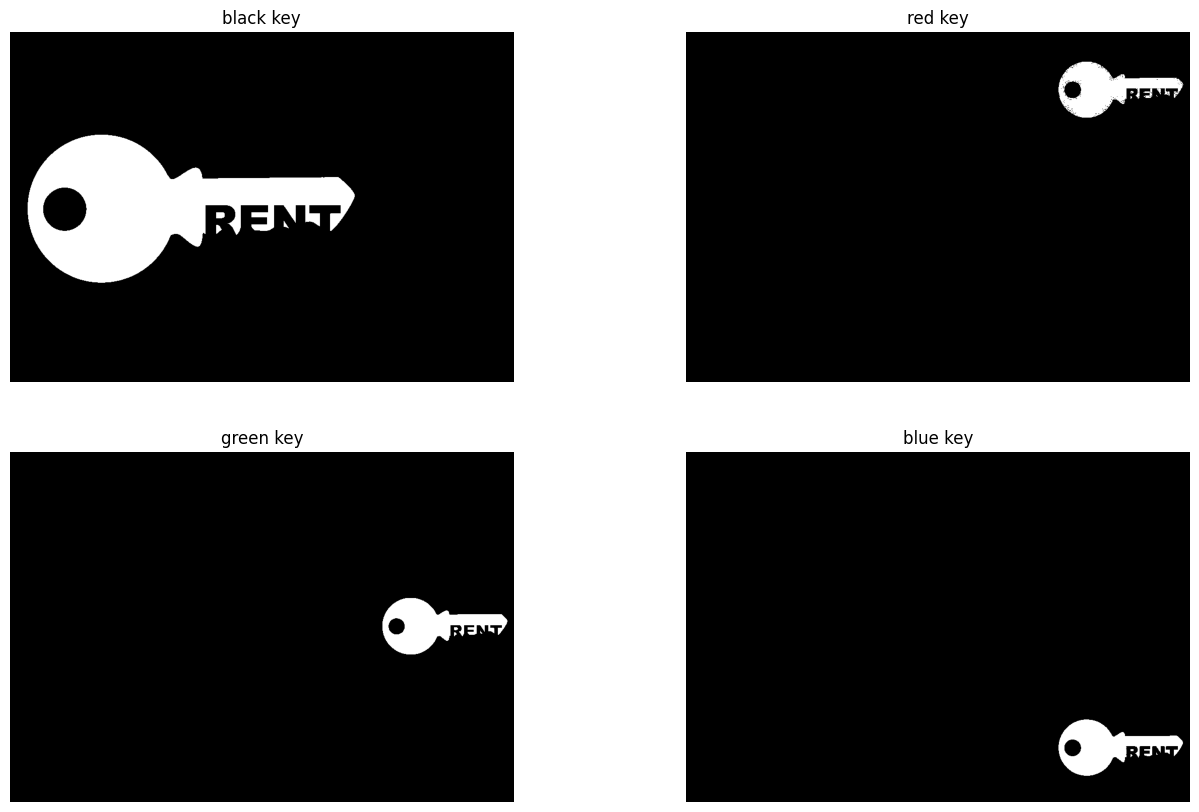

In [13]:
# Figuras
plt.figure(figsize=(16, 10))
for row in range(2):
  for col in range(2):
    idx = row * 2 + col + 1
    plt.subplot(2, 2, idx)
    plt.imshow(masks[list(masks.keys())[idx - 1]], cmap='gray')
    plt.title(list(masks.keys())[idx - 1]+' key')
    plt.axis('off')